# Часть 1. Моделирование и имитация релейных систем управления
## Пример релейной системы стабилизации температуры

Распространенными примерами систем управления, в которых некоторые сигналы принимают значения на конечных множествах, являются релейные системы. Релейные регуляторы — это простые и дешевые устройства, применяемые в несложных приложениях, например в термостатах отопительных систем и бытовых холодильников. 

Принципиальная схема релейной системы стабилизации температуры (термостата) изображена на изображении ниже.  Датчик температуры $\theta$ доставляет информацию о достижении пороговых значений $\theta_{min}$, $\theta_{max}$ и, тем самым, выделяет три ситуации (события):


![Принципиальная схема релейной системы стабилизации температуры](https://)


1.   $\theta <\theta_{min}$ -  "Прохладно"
2.   $\theta_{min} < \theta <\theta_{max}$ - "Комфортно"
3.   $\theta >\theta_{max}$ - "Жарко"

Управляющее воздействие  — напряжение, приложенное к нагревательному элементу, может принимать два значения 0 В (выключен) и 220 В (включен). 

Система функционирует в условиях дефицита информации о состоянии объекта и минимального разнообразия управляющих воздействий. Алгоритм принятия решений выразим в форме правил:

1. ЕСЛИ («Прохладно») ТО (Нагреватель включен);
2. ЕСЛИ («Тепло») ТО (Нагреватель выключен);
3. ЕСЛИ («Комфортно») И (Нагреватель включен) ТО (Нагреватель включен);
4. ЕСЛИ («Комфортно») И (Нагреватель выключен) ТО (Нагреватель выключен).

Ниже изображена статическая характеристика (СХ) релейного регулятора с гистерезисом для пороговых значений температуры $\theta_{min} = 21℃$, $\theta_{max} = 23℃$. 

![СХ релейного регулятора](https://digiratory.ru/wp-content/uploads/lab4_СХ_релейного-регулятора.gif)


Обратим внимание на важное обстоятельство — если значения температуры принадлежат интервалу двузначности СХ, т. е. лежат между двумя пороговыми значениями, воздействие на объект определяется не только входом, но и состоянием объекта до того, как значение температуры вошло в этот интервал. Другими словами, выход регулятора определяется и предысторией, так как регулятор имеет память. 

Графическое задание даже двузначной СХ типа «реле с гистерезисом» (рис. 3.3) дополняется комментариями о значениях выхода в зоне двузначности, например: 

$$
\begin {cases}
C, x > b \\ 
- C, x < -b \\
C, |x|\leq b, y_0 = C \\
-C, |x|\geq b, y_0 = -C
\end {cases}
$$

где: $b$ — половина зоны неоднозначности СХ; $y_0$ — состояние реле, равное значению $y$ до входа в зону неоднозначности. Таким образом, этот безынерционный нелинейный элемент (НЭ) обладает памятью — значение его выхода определяется не только значением входа в тот же момент, но также и предысторией (состоянием) НЭ по уровню сигнала.

Неоднозначность кусочно-постоянных СХ создает сложности формального описания релейных и логических алгоритмов управления моделями типа «вход-выход». Необходимы иные формы представления. 

## Механизм вывода в четкой логике

Механизм вывода в четкой логике (Crisp-Logic Inference System) образован последовательным соединением детектора событий, блока логики и декодера, исполняющих информационную, алгоритмическую и исполнительную функции.

![Crisp-Logic Inference System](https://digiratory.ru/wp-content/uploads/lab4_Crisp-Logic_Inference_System.gif)

Отображение непрерывного сигнала $x$ на множество символов $\widetilde{x}$ реализуется на пороговых элементах, разбивающих множества действительных значений на конечное число подмножеств. Пороги являются четкими, т. е. каждое значение входного сигнала может принадлежать строго одному подмножеству. Преобразователь $D \rightarrow C$ (декодер) сопоставляет выходным символам автомата  $\widetilde{y}_t$ действительные значения. Сигнал выхода $y_t$ представляет собой кусочно-постоянную функцию времени, уровень которой может изменяться с появлением нового символа на входе преобразователя. 

Моделью логических устройств, входы и выходы которых принимают значения из конечных множеств (символов), является автомат. Конечный автомат задается пятеркой   $<S, Y, X, \delta, \lambda>$ где $S, Y, X$ — множества состояний, выходов и входов автомата; $\delta$ — функция переходов; $\lambda$ — функция выходов. Функционирование автомата можно описать в терминах «вход-состояние-выход» 

$$
\tilde{s}' = \delta(\tilde{s}, \tilde{x}); \tilde{s}_0, \\
\tilde{y} = \lambda(\tilde{s}, \tilde{x})
$$

Здесь $\tilde{s}'$ — последующее состояние, зависящее от предыдущего состояния $\tilde{s}$ и от входа $\tilde{x}$; $\tilde{s}_0$ — начальное состояние автомата.

Механизмы вывода в четкой логике позволяют адекватно описать многозначные кусочно-постоянные преобразователи с разрывами первого рода и со сложной логикой переходов между ветвями СХ. 

Механизмы вывода в четкой логике описывают преобразования без временной памяти. Вместе с тем, внутренние состояния автомата позволяет учитывать «пространственную» память, выражаемую в многозначности преобразования — зависимости выхода от предыстории.

Системы вывода в четкой логике — частный случай механизмов логического вывода на нечетких множествах (Fuzzy-Logic Inference Systems).

## Гибридные модели релейных систем управления

Пример системы автоматической стабилизации температуры представляет систему, в которой сосуществуют как непрерывные переменные (температура), так и символьные последовательности, представляющие события (ситуации). Непрерывная часть системы описывается дифференциальными уравнениями, а моделью символьных преобразователей (логической части) являются конечные автоматы. Разнородные модели взаимодействуют посредством интерфейса, состоящего из двух частей — детектора событий $C \rightarrow D$ (измерительной части) и исполнительной части $D \rightarrow  C$.

![Гибридная система](https://digiratory.ru/wp-content/uploads/lab4_Гибридная_система.gif)

Такие системы называют гибридными. Гибридная модель типа Нероде―Кона (A. Nerode, W. Kohn) системы управления с обратной связью изображена на рисунке выше.

## Гибридная модель релейной системы регулирования температуры

Пусть непрерывная часть системы описана системой линейных дифференциальных уравнений второго порядка:

$$
T_1 {dV\over dt} + v = u, \\
T_2 {d\theta\over dt} + \theta = kv
$$

где $T_1 = 20$  мин; $T_2 = 40$ мин;  $k = 40/220 ℃/В$.

Интерфейс $C \rightarrow D$ образован двумя пороговыми элементами с выходами в виде нуля или единицы. На выходе этого детектора событий имеем бинарный вектор с двумя компонентами $[\tilde{\theta}_1, \tilde{\theta}_2]$, кодирующий три события. Примем для примера следующие значения: $\theta_{min} = 21℃$, $\theta_{max} = 23℃$. Эта часть интерфейса реализует следующее отображение: $\tilde{\theta} = [0, 0]'$, если температура ниже $21℃$; $\tilde{\theta} = [1, 0]'$, если температура выше или равна $21℃$, но ниже $23 ℃$; $\tilde{\theta} = [1, 1]'$, если температура выше или равна $23 ℃$. 

Интерфейс $D \rightarrow C$ подает на нагреватель напряжение 0 В или 220 В в зависимости от выхода автомата $\tilde{u}$ — 0 или 1.

Приведенная ранее логика управляющего устройства предполагает, что автомат имеет память. Для описания состояния автомата достаточно ввести переменную $\tilde{s}$, принимающую два значения: 0, если нагреватель выключен, и 1, если включен (объем памяти автомата — 1 бит). Тогда логику управления можно представить в виде правил:

1. ЕСЛИ ($\tilde{\theta} = [0, 0]'$) ТО ($\tilde{u}$ = 1) И ($\tilde{s} = 1$).
2. ЕСЛИ ($\tilde{\theta} = [1, 1]'$) ТО ($\tilde{u}$ = 0) И  ($\tilde{s} = 0$).
3. ЕСЛИ ($\tilde{\theta} = [1, 0]'$) И ($\tilde{s} = 1$) ТО ($\tilde{u}$ = 1) И ($\tilde{s} = 1$).
4. ЕСЛИ ($\tilde{\theta} = [1, 0]'$) И ($\tilde{s} = 0$) ТО ($\tilde{u}$ = 0) И ($\tilde{s} = 0$).

Реализующий эту логику автомат Мура можно описать пятеркой — тремя множествами: $S = \{ 0;1 \}; \Theta = \{[0 \space 0]'; [0 \space 1]'; [1 \space 1]'\}; U=\{0;1\}$, а также функциями перехода и выхода, которые зададим в виде таблицы.


| $\tilde{\theta}_1$  | $\tilde{\theta}_2$  | $\tilde{\theta}_3$  | $\tilde{\theta}_4$  | $\tilde{\theta}_5$  |
|---|---|---|---|---|
| 0 | 0 | 0 | 1 | 1 |
| 0 | 0 | 1 | 1 | 1 |
| 1 | 0 | 0 | 0 | 0 |
| 1 | 0 | 1 | 1 | 1 |
| 1 | 1 | 0 | 0 | 0 |
| 1 | 1 | 1 | 0 | 0 |

В таблице шесть строк вместо четырех правил, так как правило 1 объединяет строки 1 и 2 таблицы, а правило 2 — строки 5 и 6. 

При трехмерном бинарном векторе $(\tilde{\theta}_1, \tilde{\theta}_2, \tilde{s})'$ число состояний равно: $2^3=8$, однако не все они актуальны. К невозможным ситуациям относятся следующие: $[0 \space 1 \space 0]'$ и $[0 \space 1 \space 1]'$, так как второе пороговое значение температуры не может наступить ранее первого. Соответствующие строки в таблице отсутствуют. 
Логика автомата наглядно изображается в виде диаграммы графа; для автомата Мура релейного регулятора диаграмма изображена ниже.

![Автомат Мура релейного регулятора](https://digiratory.ru/wp-content/uploads/lab4_Конечный_автомат.png)



## Имитация релейной системы регулирования температуры.
Основным методом исследования систем управления по гибридным моделям является компьютерная имитация. 

Произведем компьютерную имитацию работы системы из примера:
$$
T_1 {dV\over dt} + v = u, \\
T_2 {d\theta\over dt} + \theta = kv
$$

где $T_1 = 20$  мин; $T_2 = 40$ мин;  $k = 40/220 ℃/В$.

Для имитации воспользуемся наработками из прошлых работ. И преобразуем систему дифференциальных уравнение в форму Коши:

$$
{dV\over dt} ={ u - V \over T_1 }, \\
{d\theta\over dt}  = { kV -\theta \over T_2 }
$$



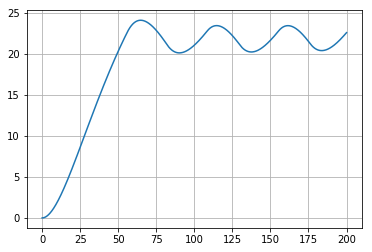

In [2]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

T_1 = 20
T_2 = 40
k = 40/220
state = 0
def ode_sys_1_control(x):
    try:
        ode_sys_1_control.state
    except:
        ode_sys_1_control.state = 0
    c_1 = x >= 21
    c_2 = x >= 23
    
    if not c_1 and not c_2:
        ode_sys_1_control.state = 1
        return 1
    elif c_1 and c_2:
        ode_sys_1_control.state = 0
        return 0
    elif c_1 and not c_2 and ode_sys_1_control.state==1:
        ode_sys_1_control.state = 1
        return 1
    elif c_1 and not c_2 and ode_sys_1_control.state==0:
        ode_sys_1_control.state = 0
        return 0

def ode_sys_1(x, t):
    """
    Функция, рализующая систему из первого примера
    """
    v, theta = x
    
    u = 220 * ode_sys_1_control(theta)
    dv_dt = (u - v)/T_1
    dtheta_dt = (k*v - theta) / T_2
    return (dv_dt, dtheta_dt)


y0 = (0, 0)
t = np.linspace(0, 200, 1001)
sol_ode_sys_1 = odeint(ode_sys_1, y0, t)

plt.plot(t, sol_ode_sys_1[:,1])
plt.grid()

**ЗАДАНИЕ**

Проведите анализ результатов, включающий следующие пункты:


1.  Анализ установившегося режима
2.  Частота колебаний в установившемся режиме
3.  Амплитуда колебаний в установившемся режиме
4.  Процедуру измерений п.2 и п. 3
5.  Анализ реализации релейного регулятора относительно теории выше 
6.  Построение фазового портрета системы


Замените регулятор на идеальное реле и повторите анализ системы.

# Часть 2. Анализ устойчивости положений равновесия нелинейных систем
## Первый метод Ляпунова
Позволяет судить об устойчивости положения равновесия по линеаризованным уравнениям. Метод основан на утверждениях:
- если собственные значения линеаризованной системы имеют отрицательные действительные части (линеаризованная система асимптотически устойчива), то положение равновесия нелинейной системы устойчиво «в малом»;
- если среди собственных значений линеаризованной системы имеются «правые», то положение равновесия нелинейной системы неустойчиво; 
- если имеются некратные собственные значения на мнимой оси, а остальные — «левые», то в этом критическом случае по линеаризованной модели нельзя судить об устойчивости положения равновесия нелинейной системы.

Подробнее о методах определения устойчивости нелинейных систем можно прочитать тут: [Устойчивость нелинейных систем](https://digiratory.ru/792)


### Задание 1

Проанализируйте первым методом Ляпунова нелинейный осцилятор, заданный следующей системой дифференциальных уравнений.
$$
{dV_1\over dt} = V_2, \\
{dV_2\over dt} = -V_1 -V_2^3
$$

Проверьте себя, построив фазовый портрет системы и проанализировав его.

### Задание 2

Проанализируйте первым методом Ляпунова систему, заданную следующей структурной схемой:

![alt text](https://digiratory.ru/wp-content/uploads/Lab4_NonLinSys.png)

Для выпонения задания вам необходимо составить по схеме систему дифференциальных уравнений.

Проверьте себя, построив фазовый портрет системы и проанализировав его.

# Часть 3. Метод гармонического баланса

Очевидно, что с помощью методов практически невозможно анализировать системы нелинейностями подобными различного рода реле, т.к. они сложны для выражения в виде аналитических функций.

В таких системах, как правило, наблюдается режим автоколебаний, который вы могли наблюдать в первой части лабораторной работы. Аналитический анализ автоколебаний в установившемся режиме востребован при решении задачи настройки системы, в частности оптимищации релейного регулятора.

Анализ систем, имеющих автоколебательные режимы включает в себя следующие этапы:


1.   Гармоническая линеаризация 
2.   Определение параметров переодических режимов (по линеаризованной системе)
3.   Определение устойчивости предельного цикла

Подробнее об этапах анализа можно прочитать:

*   [Автоколебания. Введение](https://digiratory.ru/711)
*   [Автоколебания. Гармоническая линеаризация](https://digiratory.ru/732)
*   [Автоколебания. Определение параметров периодических режимов](https://digiratory.ru/752)
*   [Автоколебания. Устойчивость](https://digiratory.ru/762)
*   На страницах учебника


## Задание

Проанализируйте методом гармонического баланса (метод Попова) две системы из первой части лабораторной работы (система регулирования температуры с идеалиным релейным регулятором и реле с гистерезисом). 

Полученные аналитически результаты сравните с экспериментальными, сделайте выводы о применимости и точности метода.